In [3]:
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt

## Item 1)

In [4]:
def sample_hist(samples,mean,std):
    hist=plt.hist(samples,bins=100,density=True) # histograma normalizado
    plt.vlines(mean,0,max(hist[0])*1.1,color='black',linestyle='dashed',label='$\mu$')
    plt.vlines(mean-3*std,0,max(hist[0])*1.1,color='green',linestyle='dashed',label='',linewidth=2)
    plt.vlines(mean+3*std,0,max(hist[0])*1.1,color='green',linestyle='dashed',label='$\mu\pm$3$\sigma$',linewidth=2)
    plt.legend(frameon=False)
    plt.title(f'10e4 amostras de uma normal ($\mu$: {mean}, $\sigma$:{std:.2f})')
    

def univariate_samples(sample_size,mu,std):
    return np.random.normal(mu,std,sample_size)

def calculate_mean_given_x(x,mu1,mu2,sigma_12,inverse_sigma_11):
    return mu2+sigma_12*inverse_sigma_11*(x-mu1)


def calculate_variance_given_x(sigma_22,sigma_12,inverse_sigma_11):
    sigma_21=sigma_12
    return sigma_22-sigma_12*inverse_sigma_11*sigma_21


def bivariate_normal_samples(sample_size,mu,covariance_matrix):
    if isinstance(covariance_matrix,list):
        covariance_matrix=np.array(covariance_matrix,dtype=float)
    if isinstance(mu,list):
        mu=np.array(mu,dtype=float)
    mu1=mu[0]
    mu2=mu[1]

    sigma_11,sigma_12,sigma_21,sigma_22=covariance_matrix.flatten()
    inverse_sigma_11=sigma_11**-1

    samples_X1=univariate_samples(sample_size,mu=mu1,std=sigma_11**0.5)

    one_vector=np.ones(sample_size)
    conditional_mean_vector=calculate_mean_given_x(samples_X1,mu1=one_vector*mu1,mu2=one_vector*mu2,\
                                                   sigma_12=one_vector*sigma_12,inverse_sigma_11=one_vector*inverse_sigma_11)
    conditional_sigma_vector=calculate_variance_given_x(sigma_22=sigma_22,sigma_12=sigma_12,inverse_sigma_11=inverse_sigma_11)

    samples_X2=univariate_samples(1,mu=conditional_mean_vector,std=one_vector*conditional_sigma_vector**0.5)
    return np.vstack((samples_X1,samples_X2))
    

calculate_variance_given_x=np.vectorize(calculate_variance_given_x)
calculate_mean_given_x=np.vectorize(calculate_mean_given_x)
univariate_samples=np.vectorize(univariate_samples)

X~ $N_2([4.5,1],\begin{bmatrix} 13&1\\1&2\end{bmatrix})$

Usaremos a propriedade abaixo para gerar a distribuição da variável aleatória bivariada a partir de uma distribuição univariada

$P(X_2 | X_1=x) $ ~ $N (\mu=\mu_2+\Sigma_{12} \Sigma^{-1}_{11}(x-\mu_1),\ \sigma=\Sigma_{22}-\Sigma_{21}\Sigma^{-1}_{11}\Sigma_{12})$

In [5]:
mu=np.array([4.5,1.])
covariance_matrix=np.array([[13,1.],[1,2]])



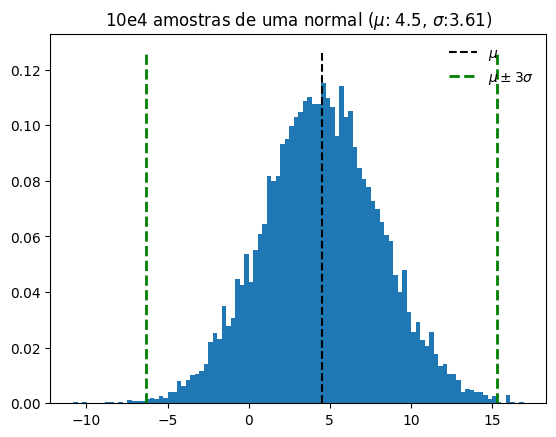

In [6]:
# O código abaixo gera 10**4 amostras de uma normal com a média 4.5 e desvio padrão sqrt(3) 
amostras_distribuicao_marginal_1=univariate_samples(mu=mu[0],std=covariance_matrix[0][0]**0.5,sample_size=10000)
sample_hist(amostras_distribuicao_marginal_1,mean=mu[0],std=covariance_matrix[0][0]**0.5)

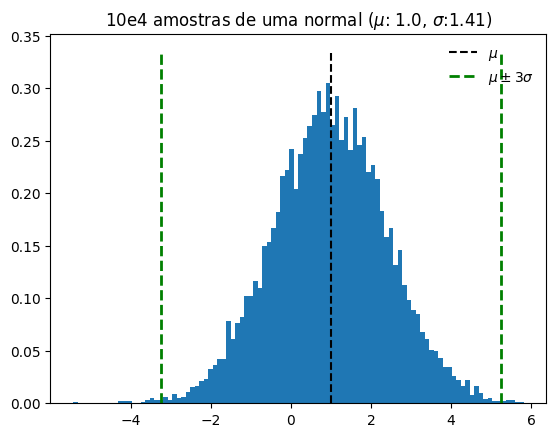

In [7]:
amostras_distribuicao_marginal_2=univariate_samples(mu=mu[1],std=covariance_matrix[1][1]**0.5,sample_size=10000)
sample_hist(amostras_distribuicao_marginal_2,mean=mu[1],std=covariance_matrix[1][1]**0.5)

In [8]:
bivariate_sample=bivariate_normal_samples(10**6,mu=mu,covariance_matrix=covariance_matrix)

Text(0.5, 1.0, 'Amostragem ideal 10e6 elementos')

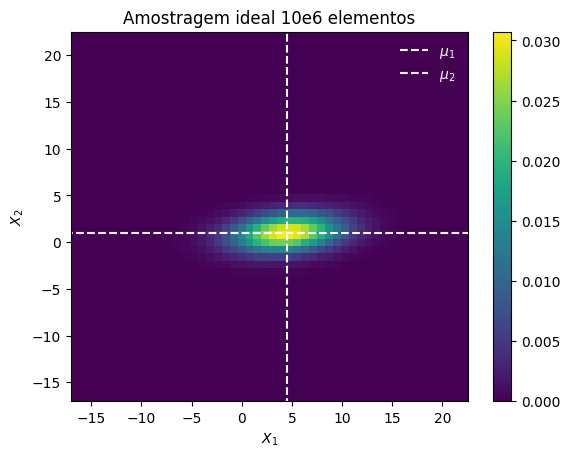

In [9]:
axismin=mu.min()-5*np.diagonal(covariance_matrix).max()**0.5
axismax=mu.max()+5*np.diagonal(covariance_matrix).max()**0.5
hist=plt.hist2d(*bivariate_sample,bins=50,density=True,range=[[axismin,axismax],[axismin,axismax]])
mean1=mu[0]
plt.vlines(mean1,hist[2].min()*1.1,hist[2].max()*1.1,color='white',linestyle='dashed',label='$\mu_1$')
mean2=mu[1]
plt.hlines(mean2,hist[1].min()*1.1,hist[1].max()*1.1,color='white',linestyle='dashed',label='$\mu_2$')
plt.legend(frameon=False,labelcolor='white')
plt.colorbar()
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Amostragem ideal 10e6 elementos')

amostras_bivariadas=bivariate_normal_samples(10**6,mu=mu,covariance_matrix=covariance_matrix)

In [10]:
amostras_bivariadas_reais=bivariate_normal_samples(10**3,mu=mu,covariance_matrix=covariance_matrix)

Text(0.5, 1.0, 'Amostragem real 10e3 elementos')

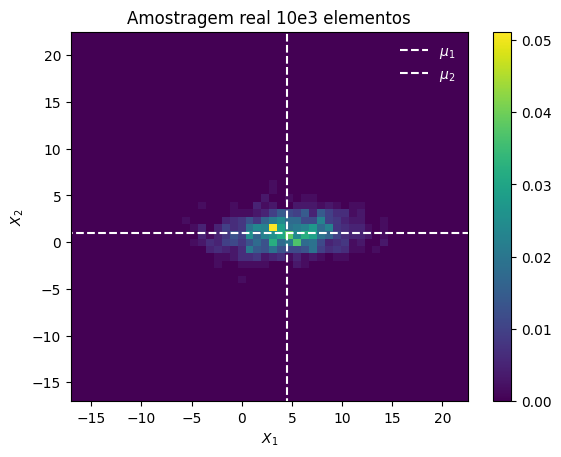

In [11]:
axismin=mu.min()-5*np.diagonal(covariance_matrix).max()**0.5
axismax=mu.max()+5*np.diagonal(covariance_matrix).max()**0.5
hist=plt.hist2d(*amostras_bivariadas_reais,bins=50,density=True,range=[[axismin,axismax],[axismin,axismax]])
mean1=mu[0]
plt.vlines(mean1,hist[2].min()*1.1,hist[2].max()*1.1,color='white',linestyle='dashed',label='$\mu_1$')
mean2=mu[1]
plt.hlines(mean2,hist[1].min()*1.1,hist[1].max()*1.1,color='white',linestyle='dashed',label='$\mu_2$')
plt.legend(frameon=False,labelcolor='white')
plt.colorbar()
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Amostragem real 10e3 elementos')

## Item 2

Temos que por que os parâmetos que maximizam a verossimilhança são as médias amostral, e a variância amostral observadas na amostra, e a variância experiemetal encontradas nos dados obtidos.

De uma maneira matemática temos que:


$\hat{\mu}=\frac{1}{n}\sum_i^nX_i$

$\hat{\Sigma}=S_{n-1}$

In [12]:
def sum_of_log_likelihood(data,mean,covariance_matrix):
    return np.sum(np.log(sci.stats.multivariate_normal.pdf(data,mean,covariance_matrix,allow_singular=True)))

In [13]:
print(f'A soma do log da verossimilhança dos parâmetros ideias geradores da distribuição é {sum_of_log_likelihood(amostras_bivariadas_reais.T,mu,covariance_matrix)}')


A soma do log da verossimilhança dos parâmetros ideias geradores da distribuição é -4395.786821725651


In [14]:
number_of_realizations=10**5

gaussian_likelihood=np.empty((number_of_realizations,6))
for iteration in range(number_of_realizations):
    mean_temp=np.random.uniform(-10,10, 2)
    mean1=mean_temp[0]
    mean2=mean_temp[1]
    A = np.random.uniform(-5,5, (2,2))
    covariance_matrix_temp = A* A.T
    sigma_11=covariance_matrix_temp[0,0]
    sigma_21=covariance_matrix_temp[1,0]
    sigma_22=covariance_matrix_temp[1,1]
    mean_temp=np.array([mean1,mean2])
    try:
        gaussian_likelihood[iteration]=[mean1,mean2,sigma_11,sigma_22,sigma_21,sum_of_log_likelihood(amostras_bivariadas_reais.T,mean_temp,covariance_matrix_temp)]
    except:
        gaussian_likelihood[iteration]=[mean1,mean2,sigma_11,sigma_22,sigma_21,-10**4]

/tmp/ipykernel_175804/21214279.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(sci.stats.multivariate_normal.pdf(data,mean,covariance_matrix,allow_singular=True)))


In [15]:
index_max_likelihood=np.argmax(gaussian_likelihood[:,-1])
print(f'A maior verossimilhança encontra-se no index {index_max_likelihood} do vetor\n')
print(f'o vetor média é igual a {gaussian_likelihood[index_max_likelihood,0:2]}')
sigma_11,sigma_22,sigma_21=gaussian_likelihood[index_max_likelihood][2:5]
print(f'a matriz de covariâncias é {[[round(sigma_11,1),round(sigma_21,1)],[round(sigma_21,1),round(sigma_22,1)]]}')
print(f'o valor da máxima verossimilhança encontrado foi {gaussian_likelihood[index_max_likelihood,-1]:.1f}')


A maior verossimilhança encontra-se no index 78295 do vetor

o vetor média é igual a [4.18927436 1.13316958]
a matriz de covariâncias é [[13.9, 0.1], [0.1, 1.6]]
o valor da máxima verossimilhança encontrado foi -4420.1


In [16]:
media_amostral=amostras_bivariadas_reais.mean(axis=1).round(1)
print(f'A média amostral é {media_amostral}')

A média amostral é [4.4 1. ]


In [17]:
media_amostral=amostras_bivariadas_reais.mean(axis=1).round(1)
print(f'A média amostral é {media_amostral}')
covariancia_amostral=np.cov(amostras_bivariadas_reais).round(1)
print(f'A covariância amostral é \n{covariancia_amostral}')

A média amostral é [4.4 1. ]
A covariância amostral é 
[[12.3  0.7]
 [ 0.7  1.9]]


p

Text(0.5, 1.0, 'Verossimilhança em função das Médias')

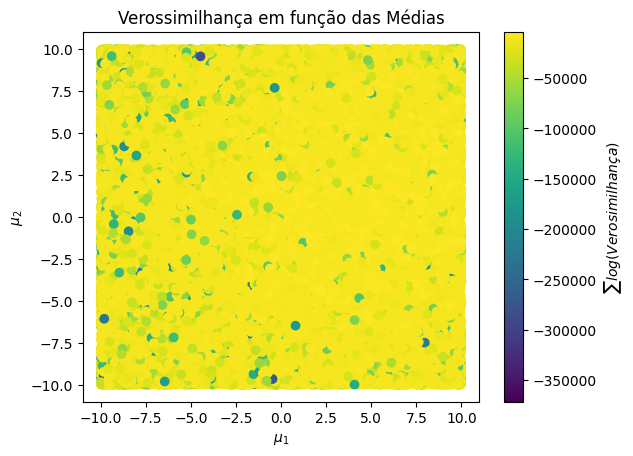

In [18]:
plt.scatter(gaussian_likelihood[:,0],gaussian_likelihood[:,1],c=gaussian_likelihood[:,-1])
plt.colorbar(label='$\sum log(Verosimilhança)$')
plt.xlabel('$\mu_1$')
plt.ylabel('$\mu_2$')
plt.title('Verossimilhança em função das Médias')

Text(0.5, 1.0, 'Verossimilhança em função das Variâncias')

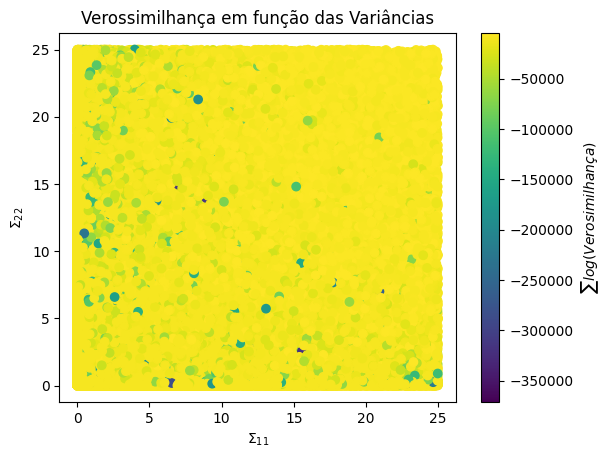

In [19]:
plt.scatter(gaussian_likelihood[:,2],gaussian_likelihood[:,3],c=gaussian_likelihood[:,-1])
plt.colorbar(label='$\sum log(Verosimilhança)$')
plt.xlabel('$\Sigma_{11}$')
plt.ylabel('$\Sigma_{22}$')
plt.title('Verossimilhança em função das Variâncias')

In [20]:
del gaussian_likelihood

## Item 3a

In [21]:
numero_amostras=10000
tamanho_amostral=100

vetor_amostras_bivariadas=np.array([bivariate_normal_samples(tamanho_amostral,mu=mu,covariance_matrix=covariance_matrix) for i in range(numero_amostras)])
vetor_medias_amostrais=vetor_amostras_bivariadas.mean(axis=2)


In [22]:
vetor_amostras_bivariadas.shape

(10000, 2, 100)

In [23]:
def plot_kurtosis_and_skewness(array,hist):
    curtose=sci.stats.kurtosis(array)
    assimetria=sci.stats.skew(array)
    plt.text(hist[1].min()*1,hist[0].max()*1.,f'Kurtosis:{curtose:.2f}\nSkewness:{assimetria:.2f}')
    

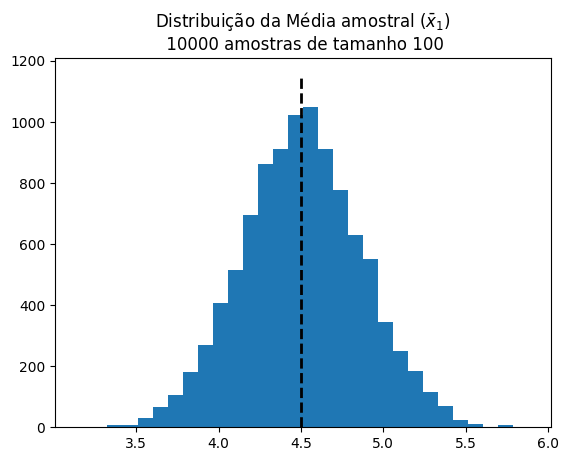

In [24]:
hist=plt.hist(vetor_medias_amostrais[:,0],bins=30)
plt.title(r'Distribuição da Média amostral ($\bar{x}_1$)'+f'\n {numero_amostras} amostras de tamanho {tamanho_amostral}')
plt.vlines(mu[0],0,hist[0].max()*1.1,label='$\mu_1$',color='black',linestyles='dashed',linewidth=2)

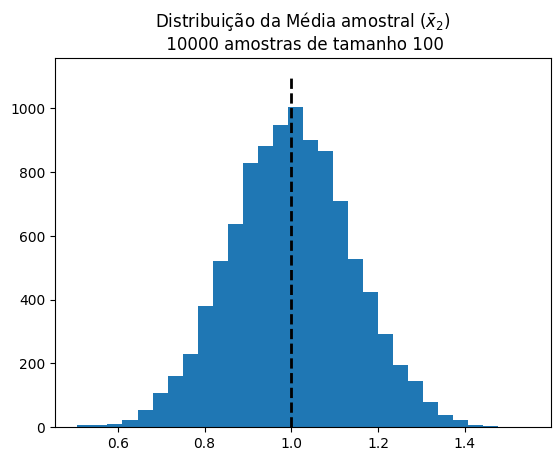

In [25]:
plt.title(r'Distribuição da Média amostral ($\bar{x}_2$)'+f'\n {numero_amostras} amostras de tamanho {tamanho_amostral}')
hist=plt.hist(vetor_medias_amostrais[:,1],bins=30)
plt.vlines(mu[1],0,hist[0].max()*1.1,label='$\mu_2$',color='black',linestyles='dashed',linewidth=2)

Text(0.5, 1.0, 'Distribuiçã da Média amostral ($\\bar{X}$)\n 10000 amostras de tamanho 100')

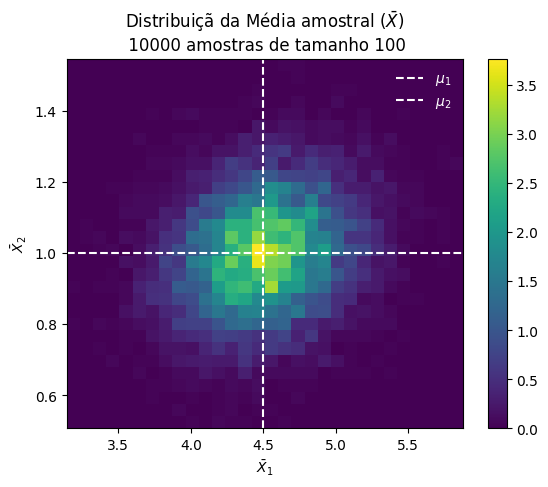

In [26]:

hist=plt.hist2d(*vetor_medias_amostrais.T,bins=30,density=True)
mean1=mu[0]
plt.vlines(mean1,hist[2].min(),hist[2].max(),color='white',linestyle='dashed',label='$\mu_1$')
mean2=mu[1]
plt.hlines(mean2,hist[1].min(),hist[1].max(),color='white',linestyle='dashed',label='$\mu_2$')
plt.legend(frameon=False,labelcolor='white')
plt.colorbar()
plt.xlabel(r'$\bar{X}_1$')
plt.ylabel(r'$\bar{X}_2$')
plt.title(r'Distribuiçã da Média amostral ($\bar{X}$)'+f'\n {numero_amostras} amostras de tamanho {tamanho_amostral}')


## Item 3b

In [27]:
vetor_covariancias_amostrais=np.array([np.cov(amostra) for amostra in vetor_amostras_bivariadas])
vetor_determinante_covariancias_amostrais=np.array([np.linalg.det(cov)  for cov in vetor_covariancias_amostrais])
vetor_covariancias_amostrais=vetor_covariancias_amostrais.reshape(-1,4,)
vetor_covariancias_amostrais.shape


(10000, 4)

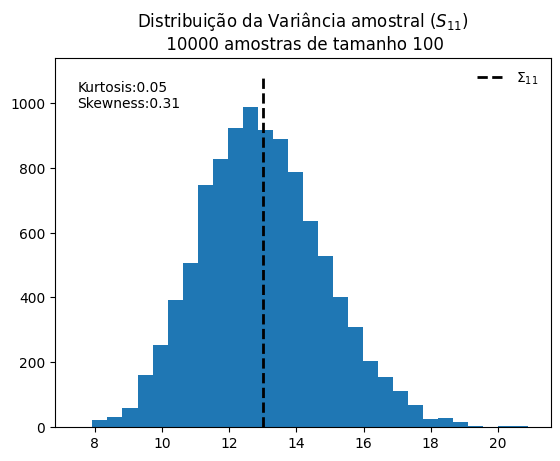

In [28]:
hist=plt.hist(vetor_covariancias_amostrais[:,0],bins=30)
plt.title(r'Distribuição da Variância amostral ($S_{11}$)'+f'\n {numero_amostras} amostras de tamanho {tamanho_amostral}')
plt.vlines(covariance_matrix[0,0],0,hist[0].max()*1.1,label='$\Sigma_{11}$',color='black',linestyles='dashed',linewidth=2)
plot_kurtosis_and_skewness(vetor_covariancias_amostrais[:,0],hist)
plt.legend(frameon=False)

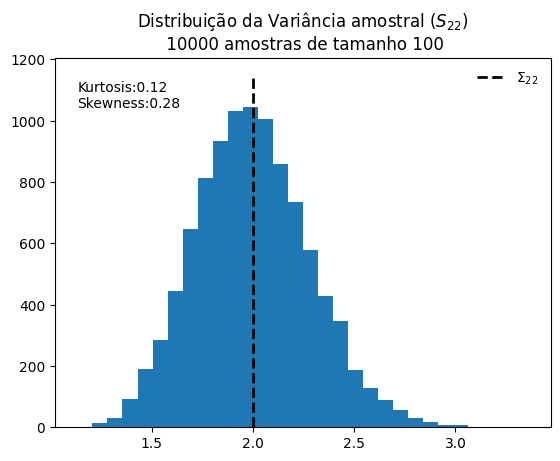

In [29]:
hist=plt.hist(vetor_covariancias_amostrais[:,-1],bins=30)
plt.title(r'Distribuição da Variância amostral ($S_{22}$)'+f'\n {numero_amostras} amostras de tamanho {tamanho_amostral}')
plt.vlines(covariance_matrix[1,1],0,hist[0].max()*1.1,label='$\Sigma_{22}$',color='black',linestyles='dashed',linewidth=2)
plot_kurtosis_and_skewness(vetor_covariancias_amostrais[:,-1],hist)
plt.legend(frameon=False)

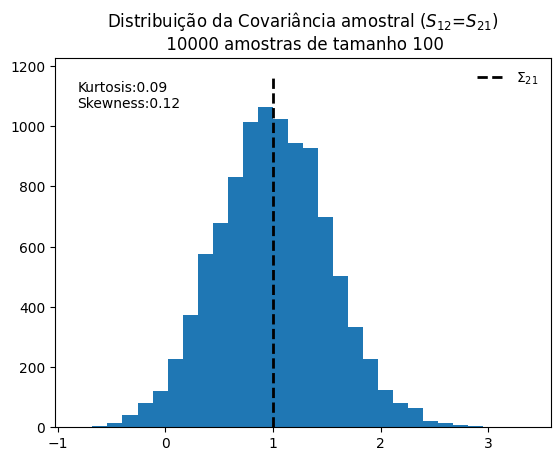

In [30]:
hist=plt.hist(vetor_covariancias_amostrais[:,1],bins=30)
plt.title(r'Distribuição da Covariância amostral ($S_{12}$=$S_{21}$)'+f'\n {numero_amostras} amostras de tamanho {tamanho_amostral}')
plt.vlines(covariance_matrix[0,1],0,hist[0].max()*1.1,label='$\Sigma_{21}$',color='black',linestyles='dashed',linewidth=2)
plot_kurtosis_and_skewness(vetor_covariancias_amostrais[:,1],hist)
plt.legend(frameon=False)

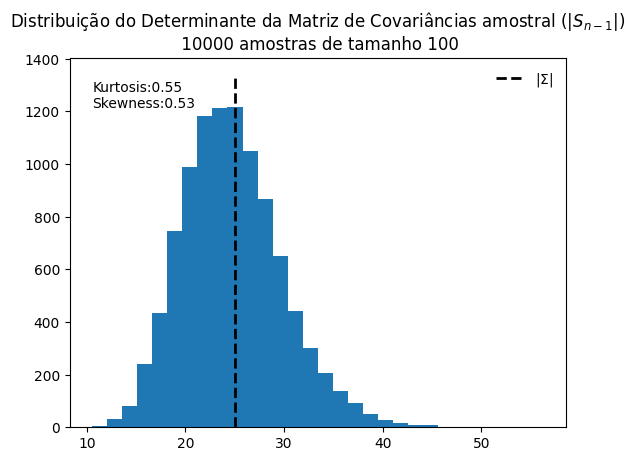

In [31]:
hist=plt.hist(vetor_determinante_covariancias_amostrais,bins=30)
plt.title(r'Distribuição do Determinante da Matriz de Covariâncias amostral ($|S_{n-1}|$)'+f'\n {numero_amostras} amostras de tamanho {tamanho_amostral}')
plt.vlines(np.linalg.det(covariance_matrix),0,hist[0].max()*1.1,label='$|\Sigma|$',color='black',linestyles='dashed',linewidth=2)
plot_kurtosis_and_skewness(vetor_determinante_covariancias_amostrais,hist)

plt.legend(frameon=False)

## Item 3c i)

In [70]:
def hotelling_t2(x,p,m):
    return p*m/(1+m-p)*sci.stats.f.pdf(x,p,m-p+1)
    pass

In [46]:
np.linalg.inv(covariance_matrix)

array([[ 0.08, -0.04],
       [-0.04,  0.52]])

In [34]:
mu_h0=mu

1x2 x 2x2 x 2x1

1x2 x 2x1

1x1

In [65]:
(vetor_medias_amostrais[:10]-mu).reshape(1,2,-1).shape

(1, 2, 10)

In [68]:
np.matmul((vetor_medias_amostrais[:10]-mu).reshape(-1,2),np.matmul(np.linalg.inv(covariance_matrix),(vetor_medias_amostrais[:10]-mu).reshape(2,-1))).shape

(10, 10)

In [76]:
np.matmul((vetor_medias_amostrais[10]-mu).reshape(-1,2),np.matmul(np.linalg.inv(covariance_matrix),(vetor_medias_amostrais[10]-mu).reshape(2,-1)))

array([[0.0393848]])

In [75]:
hotelling_t2(0.9,p=2,m=tamanho_amostral)

0.8132334929465904

In [39]:
vetor_medias_amostrais[:2]-mu

array([[ 0.08169735, -0.18666434],
       [-0.05940615, -0.08281245]])